In [1]:
import sys
import os
sys.path.insert(0, os.path.dirname(os.getcwd()))
from config import *

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline

/Users/Quintus/anaconda3/envs/cobra_py36/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Kernel: linear

In [16]:
clf = SVC(C=1, kernel='linear', probability=True)
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

<module 'matplotlib.pyplot' from '/Users/Quintus/anaconda3/envs/cobra_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

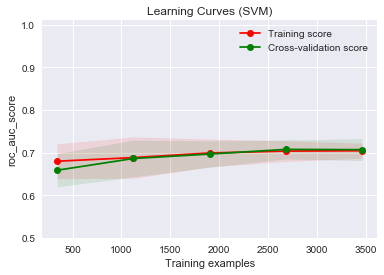

In [18]:
title = "Learning Curves (SVM)"
plot_learning_curve(clf, title, X_train, y_train, ylim=(0.5, 1.01), cv=cv, metric=roc_auc_score, n_jobs=4)
# underfitting

In [ ]:
title = "Validation Curves (SVM)"
clf = SVC(kernel = 'linear', probability=True)
plot_validation_curve(clf, title, X_train, y_train, ylim=(0.1, 1.01), cv=cv, metric=roc_auc_score, n_jobs=4, param_name='C', param_range=np.logspace(-7, 4, 5), log_scale=True)

10000.0


<module 'matplotlib.pyplot' from '/Users/Quintus/anaconda3/envs/cobra_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

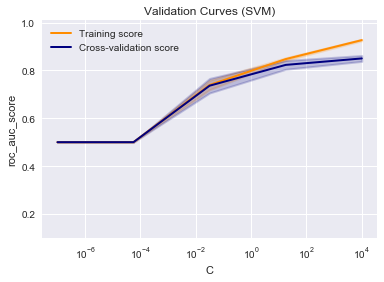

In [8]:
title = "Validation Curves (SVM)"
clf = SVC(kernel = 'rbf', probability=True)
plot_validation_curve(clf, title, X_train, y_train, ylim=(0.1, 1.01), cv=cv, metric=roc_auc_score, n_jobs=4, param_name='C', param_range=np.logspace(-7, 4, 5), log_scale=True)
# C is the regularization parameter
# larger C -> smaller the margin to avoid the penalty
# in our case, large C 1000 gives a good performance, small margin still can generalize well, which means 

In [4]:
params = {'C': np.logspace(-3, 4, 5),
          'kernel': ['linear', 'rbf', 'poly']
         }
clf = SVC(probability=True)
gs = GridSearchCV(clf, params, scoring=make_scorer(roc_auc_score), cv=cv)
gs.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-07, 3.16228e-05, 1.00000e-02, 3.16228e+00, 1.00000e+03]), 'kernel': ['linear', 'rbf', 'poly']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(roc_auc_score), verbose=0)

In [5]:
gs.best_params_

{'C': 1000.0, 'kernel': 'rbf'}

In [6]:
gs.best_score_

0.8432101899093001

<module 'matplotlib.pyplot' from '/Users/Quintus/anaconda3/envs/cobra_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

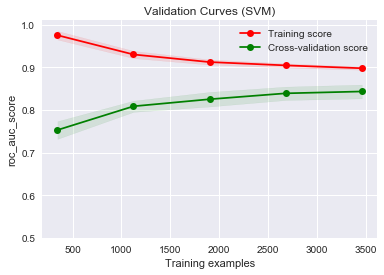

In [19]:
title = "Validation Curves (SVM)"
clf = SVC(**gs.best_params_, probability=True)
plot_learning_curve(clf, title, X_train, y_train, ylim=(0.5, 1.01), cv=cv, metric=roc_auc_score, n_jobs=4)

/Users/Quintus/anaconda3/envs/cobra_py36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:811: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(train_sizes_abs.dtype, np.float):


<module 'matplotlib.pyplot' from '/Users/Quintus/anaconda3/envs/cobra_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

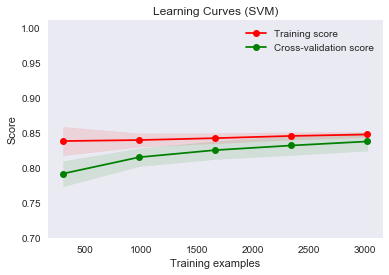

In [6]:
title = "Learning Curves (SVM)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
plot_learning_curve(clf, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

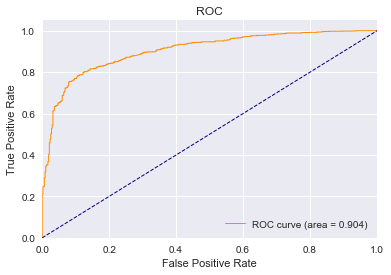

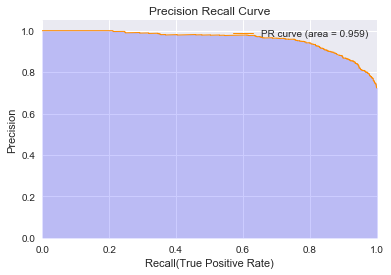

In [7]:
# plot - ROC-AUC
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")

# plot - PR-AUC
precision, recall, _ = precision_recall_curve(y_test, y_prob[:, 1])
pr_auc = average_precision_score(y_test, y_prob[:, 1])

plt.figure()
plt.plot(recall, precision, color='darkorange', lw=1, label='PR curve (area = %0.3f)' % pr_auc)
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall(True Positive Rate)')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.legend(loc="upper right")

In [8]:
# tuning: kernel, gamma?, tol,  ...

In [9]:
tpr

array([8.66551127e-04, 2.11438475e-01, 2.11438475e-01, 2.46100520e-01,
       2.46100520e-01, 2.48700173e-01, 2.48700173e-01, 2.91161179e-01,
       2.91161179e-01, 3.18024263e-01, 3.18024263e-01, 3.45753899e-01,
       3.45753899e-01, 3.50953206e-01, 3.50953206e-01, 3.53552860e-01,
       3.53552860e-01, 3.68284229e-01, 3.68284229e-01, 4.02946274e-01,
       4.02946274e-01, 4.58405546e-01, 4.58405546e-01, 4.76603120e-01,
       4.76603120e-01, 5.02599653e-01, 5.02599653e-01, 5.29462738e-01,
       5.29462738e-01, 5.44194107e-01, 5.44194107e-01, 6.11785095e-01,
       6.11785095e-01, 6.16117851e-01, 6.16117851e-01, 6.34315425e-01,
       6.34315425e-01, 6.35181976e-01, 6.35181976e-01, 6.36915078e-01,
       6.36915078e-01, 6.39514731e-01, 6.39514731e-01, 6.40381282e-01,
       6.40381282e-01, 6.49913345e-01, 6.49913345e-01, 6.51646447e-01,
       6.51646447e-01, 6.54246101e-01, 6.54246101e-01, 6.56845754e-01,
       6.56845754e-01, 6.57712305e-01, 6.57712305e-01, 6.62045061e-01,
      

In [10]:
precision

array([0.72396487, 0.72379159, 0.72424623, ..., 1.        , 1.        ,
       1.        ])

In [11]:
recall

array([1.00000000e+00, 9.99133449e-01, 9.99133449e-01, ...,
       1.73310225e-03, 8.66551127e-04, 0.00000000e+00])